# Определение закономерностей влияющих на успешность продаж игр

В нашем распоряжении данные об интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). **Нужно выявить определяющие успешность игры закономерности**. Что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Нужно отработать принцип работы с данными.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## **Шаг 1. Открытие файла с данными и изучение общей информации:**

In [64]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats as st

In [65]:
# читаем файл с данными и сохраненяем в data
try:
    data = pd.read_csv("C:\py\Проект\games.csv")
except:
    data = pd.read_csv("/datasets/games.csv")

In [66]:
# изучаем общую информацию о датафрейме
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [67]:
# выводим первые десять строк
data.head(10) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [68]:
# смотрим сводную статистику данных 
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [69]:
# проверяем данные на наличие явных дубликатов
data.duplicated().sum()

0

In [70]:
# определяем пропуски и считаем их
data.isna().sum() 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Проведя предварительный анализ выявили значения с пропусками: основной объём пропусков в блоке с оценками и рейтингами, далее пропуски в столбце с годом выхода игры, и всего по два пропуска в стобцах с названием игры и и жанром(скорее всего они взаимосвязаны).

## Шаг 2. Подготовка данных:

- замена названия столбцов (приведём к нижнему регистру):

In [71]:
# приведем все названия к нижнему регистру
data.columns = map(str.lower, data.columns)

In [72]:
# убедимся, что регистр в названиях изменился на нижнний
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- преобразование данных в нужные типы:

Заменим тип данных в столбцe **year_of_release** на целочисленный :

In [73]:
# заменим тип данных
data['year_of_release'] = data['year_of_release'].astype('Int64')

В столбце **user_score** нужно заменить тип данных на вещественный, но при замене происходит ошибка, выполнив проверку значений на уникальные значения, выявили строчный тип данных ('tbd'), поэтому для начала заменим его на nan:

In [74]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [75]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'] = data['user_score'].astype('float')

Убедимся, что типы изменились:

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [77]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


- обработаем пропуски:

In [78]:
# посмотрим, сколько пропусков в данных
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В столбце **name** имеется всего два пропуска. Посмотрим эти строчки подробнее:

In [79]:
data.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как отсутсвуют значения и в других столбцах - возможно этих игр не было в исходных данных в процессе создания датасета. Поэтому удалим эти строчки и как видно аналогично эти же два единственных пропуска имеется и в столбце **genre**, поэтому они тоже удалятся:

In [80]:
data = data.dropna(subset = ['name']).reset_index(drop=True)

Посмотри пустые строки в столбце **year_of_release**:

In [81]:
data.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Удалим эти пустые строки, их 269 штук (это примерно 1.5% от всего объёма данных):

In [82]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Посмотрим на пропуски в столбце **critic_score**:

In [83]:
data.query('critic_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Здесь половина данных с пропусками, чтобы не искажать датафрейм оставим их.

Дальше посмотрим пропуски в столбце **user_score**:

In [84]:
data.query('user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


 Аналогично оставим их.

Посмотрим на пропуски в столбце **rating**:

In [85]:
data.query('rating.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В столбце **rating** заменим пустые знчения на 'absent' (отсутствует):

In [86]:
#Заменим пропущенные значения
data['rating'] = data['rating'].fillna('absent')

Пропуски в столбцах **critic_score** и **user_score** ничем не стали заменять, так как нет дополнительных данных откуда их можно взять. А заменять на среднее значение не стоит, так как произойдет искажение всего датафрейма. Причинами появления этих всех пропусков могут быть ошибки выгрузки данных, актульность исходных таблиц или что-то другое. В столбце **rating** заменили пустые знчения на 'absent'.

- аббревиатура "tbd" в столбце **user_score**. Подробнее это "To Be Determined", то есть "Будет определено", это означает, что игра пока не оценена. Но она была нами обнаружена ещё при преобразовании данных в нужные типы. Там мы присвоили значение NaN для корректного преобразования типа данных в столбце. 

In [87]:
# убедимся, что пропуски удалились
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

- посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [88]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [89]:
# убедимся, что столбец создался
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,absent,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,absent,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,absent,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,absent,28.31


## Шаг 3. Проведём исследовательский анализ данных:

- посмотрим сколько игр выпускалось в разные годы, для этого построим линейный график:

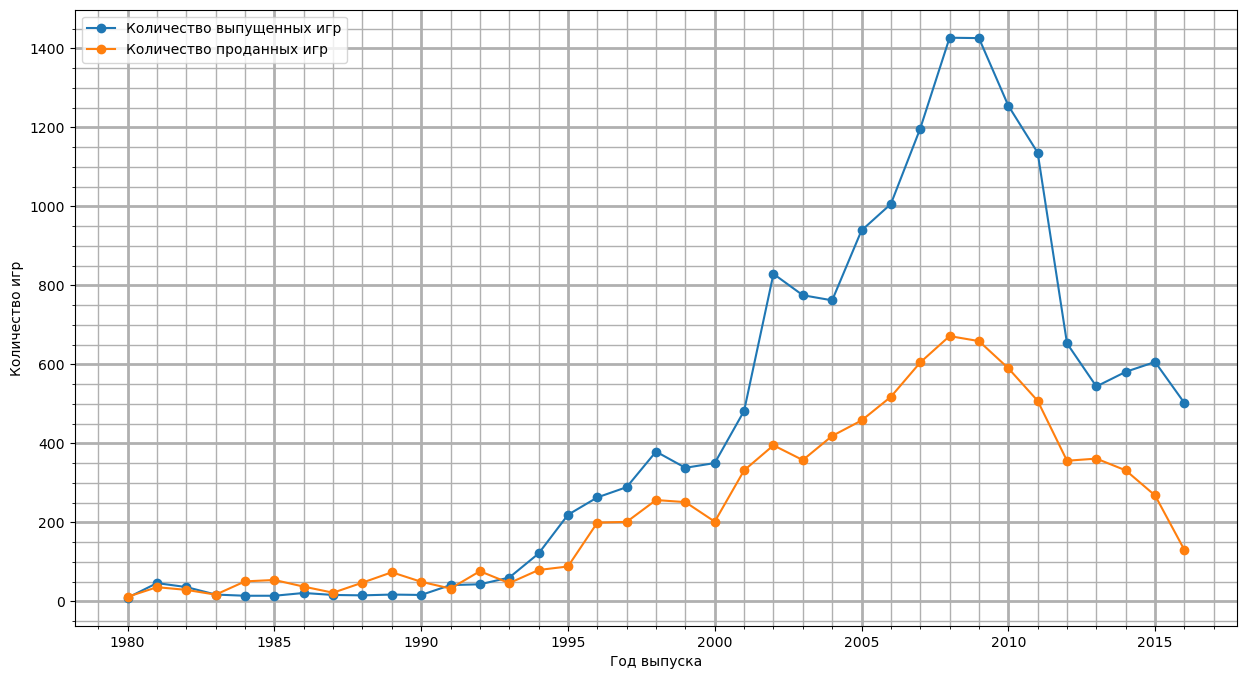

In [90]:
plt.figure(figsize=(15,8))                                                                                    # создаём полотно графика 
plt.minorticks_on()                                                                                           # включаем второстепенные деления сетки
plt.grid(which = 'minor', linewidth = 1)                                                                      # изменяем параметры второстепенной сетки
plt.grid(which = 'major', linewidth = 2)                                                                      # изменяем параметры основной сетки
plt.plot(data.groupby('year_of_release')['name'].count(), label='Количество выпущенных игр', marker ='o')     # строим первый график 
plt.plot(data.groupby('year_of_release')['total_sales'].sum(), label='Количество проданных игр', marker ='o') # строим второй график
plt.legend()                                                                                                  # включаем блок с отображением надписей 
plt.xlabel('Год выпуска')                                                                                     # указываем название по оси x
plt.ylabel('Количество игр')                                                                                  # указываем название по оси y
plt.show()                                                                                                    # выводим график на экран

Так же создадим сводную таблицу по общему количеству игр в разные годы:

In [91]:
data.groupby('year_of_release')['name'].count().sort_values(ascending=False).reset_index()

,year_of_release,name
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


До 1995 года создавлось малое количество игр. Видимо технологии ещё не позволяли развиваться рынку игр. Затем 1995 году наблюдается резкий скачок, в связи повсеместным распространением и рынок игр стремительно набирает обороты. В 2002 году количество игр становится ещё больше и продолжает расти до 2011 года. Самое большое количество игр выпускалось в 2008-2009 годах. В 2013 году видно падение в половину предыдущего года и дальше никакого роста нет. Скорее всего это связано с появлением мобильных игр в телефонах и развитием социальных сетей. Нет спроса на игр, значит и не имеет смысла выпускать новые. Вероятно, производители игр решили инвестировать в мобильные игры. Данные до 1995 года не обладают актуальностью.

- посмотрим, как менялись продажи по платформам:

Создадим список с наибольшими суммарными продажами и выведем топ 10 платформ на экран:

In [92]:
sale_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index() # создаём переменную
print(sale_platform[:10])
top_sale_platforms = sale_platform['platform'][:10].to_list()                                            # список топ 10 платформ по продажам
print(f'Список топ 10 платформ по продажам: {top_sale_platforms}')

  platform  total_sales
0      PS2      1233.56
1     X360       961.24
2      PS3       931.34
3      Wii       891.18
4       DS       802.78
5       PS       727.58
6      PS4       314.14
7      GBA       312.88
8      PSP       289.53
9      3DS       257.81
Список топ 10 платформ по продажам: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


Построим график с распределением по годам с наибольшими суммарными продажамии топ 10, это **PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS**:

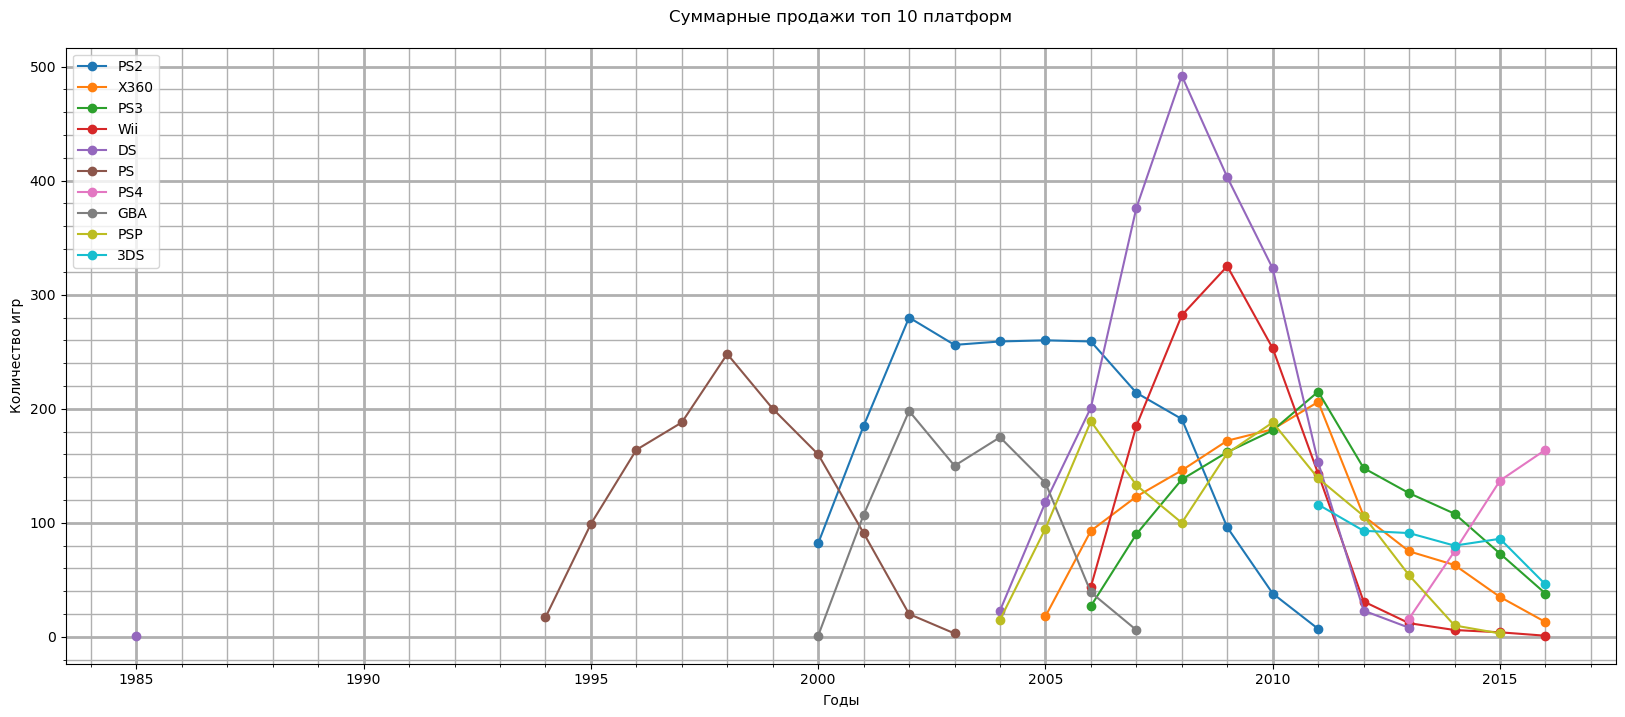

In [93]:
platform_type_releases = data.pivot_table(index='platform', values = 'name', columns='year_of_release', aggfunc='count').T # создаём сводную таблицу - количество выпуска платформ по годам
plt.figure(figsize=(20, 8))                                                                                                # создаём полотно графика
plt.minorticks_on()                                                                                                        # включаем второстепенные деления сетки
plt.grid(which = 'minor', linewidth = 1)                                                                                   # изменяем параметры второстепенной сетки
plt.grid(which = 'major', linewidth = 2)                                                                                   # изменяем параметры основной сетки
plt.plot(platform_type_releases['PS2'], marker ='o', label='PS2')                                                          # строим первый график
plt.plot(platform_type_releases['X360'], marker ='o', label='X360')                                                        # строим второй график
plt.plot(platform_type_releases['PS3'], marker ='o', label='PS3')                                                          # строим третий график    
plt.plot(platform_type_releases['Wii'], marker ='o', label='Wii')                                                          # строим четвёртый график
plt.plot(platform_type_releases['DS'], marker ='o', label='DS')                                                            # строим пятый график
plt.plot(platform_type_releases['PS'], marker ='o', label='PS')                                                            # строим шестой график
plt.plot(platform_type_releases['PS4'], marker ='o', label='PS4')                                                          # строим седьмой график
plt.plot(platform_type_releases['GBA'], marker ='o', label='GBA')                                                          # строим восьмой график
plt.plot(platform_type_releases['PSP'], marker ='o', label='PSP')                                                          # строим девыятый график
plt.plot(platform_type_releases['3DS'], marker ='o', label='3DS')                                                          # строим десятый график
plt.xlabel('Годы')                                                                                                         # указываем название по оси x
plt.ylabel('Количество игр')                                                                                               # указываем название по оси y 
plt.title('Суммарные продажи топ 10 платформ\n  ')                                                                         # создаём заголовок графика
plt.legend(loc='upper left')                                                                                               # включаем блок с отображением надписей
plt.show()                                                                                                                 # выводим график на экран

Посмотрим за какой характерный срок появляются новые и исчезают старые платформы в топ 10:

In [94]:
# создадим новый датафрейм, отсортированный по самым продаваемым платформам
data_platform = data.query('platform in @top_sale_platforms') 
data_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16437,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,absent,0.01
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,absent,0.00
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,absent,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,absent,0.01


In [95]:
data_platform_top10 = data_platform.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index() # создаём сводную таблицу
platform_top10 = data_platform_top10['platform'].value_counts()                                                       # считаем срок жизни платформы
print(f'Список жизни топ 10 платформ\n{platform_top10}')                                                              # выводим на экран
mean_platform_top10 = sum(platform_top10[:10]) / 10                                                                   # считаем среднее арифметическое 
print(f'Средний срок жизни платформы: {int(mean_platform_top10)}')                                                    # выводим на экран 

Список жизни топ 10 платформ
PS2     12
PSP     12
X360    12
DS      11
PS3     11
Wii     11
PS      10
GBA      8
3DS      6
PS4      4
Name: platform, dtype: int64
Средний срок жизни платформы: 9


Из самых продаваемых платформ появляются новые и исчезают старые в среднем в течении 9 лет.

- возьмём данные за соответствующий актуальный период для прогноза на 2017 год:

Как выяснили средний срок жизни платформ прримерно 9 лет, поэтому для прогноза на 2017 год возьмем предыдущий период в 9 лет, т.е. с 2008 года.

Теория 1: проверка для 9 лет

In [96]:
current_data = data[data['year_of_release'] > 2007]                                                           # создаём новый датафрейм с актуальными платформами, начиная с 2008
current_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='count')  # создаём сводную таблиццу

platform,3DS,DC,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,
2008,NaN,1.0,492.0,76.0,191.0,138.0,NaN,100.0,NaN,282.0,NaN,146.0,1.0,NaN
2009,NaN,NaN,403.0,107.0,96.0,162.0,NaN,161.0,NaN,325.0,NaN,172.0,NaN,NaN
2010,NaN,NaN,323.0,90.0,38.0,181.0,NaN,188.0,NaN,253.0,NaN,182.0,NaN,NaN
2011,116.0,NaN,153.0,139.0,7.0,215.0,NaN,139.0,18.0,143.0,NaN,206.0,NaN,NaN
2012,93.0,NaN,23.0,61.0,NaN,148.0,NaN,106.0,53.0,31.0,32.0,106.0,NaN,NaN
2013,91.0,NaN,8.0,38.0,NaN,126.0,16.0,54.0,63.0,12.0,42.0,75.0,NaN,19.0
2014,80.0,NaN,NaN,47.0,NaN,108.0,75.0,10.0,100.0,6.0,31.0,63.0,NaN,61.0
2015,86.0,NaN,NaN,50.0,NaN,73.0,137.0,3.0,110.0,4.0,28.0,35.0,NaN,80.0
2016,46.0,NaN,NaN,54.0,NaN,38.0,164.0,NaN,85.0,1.0,14.0,13.0,NaN,87.0


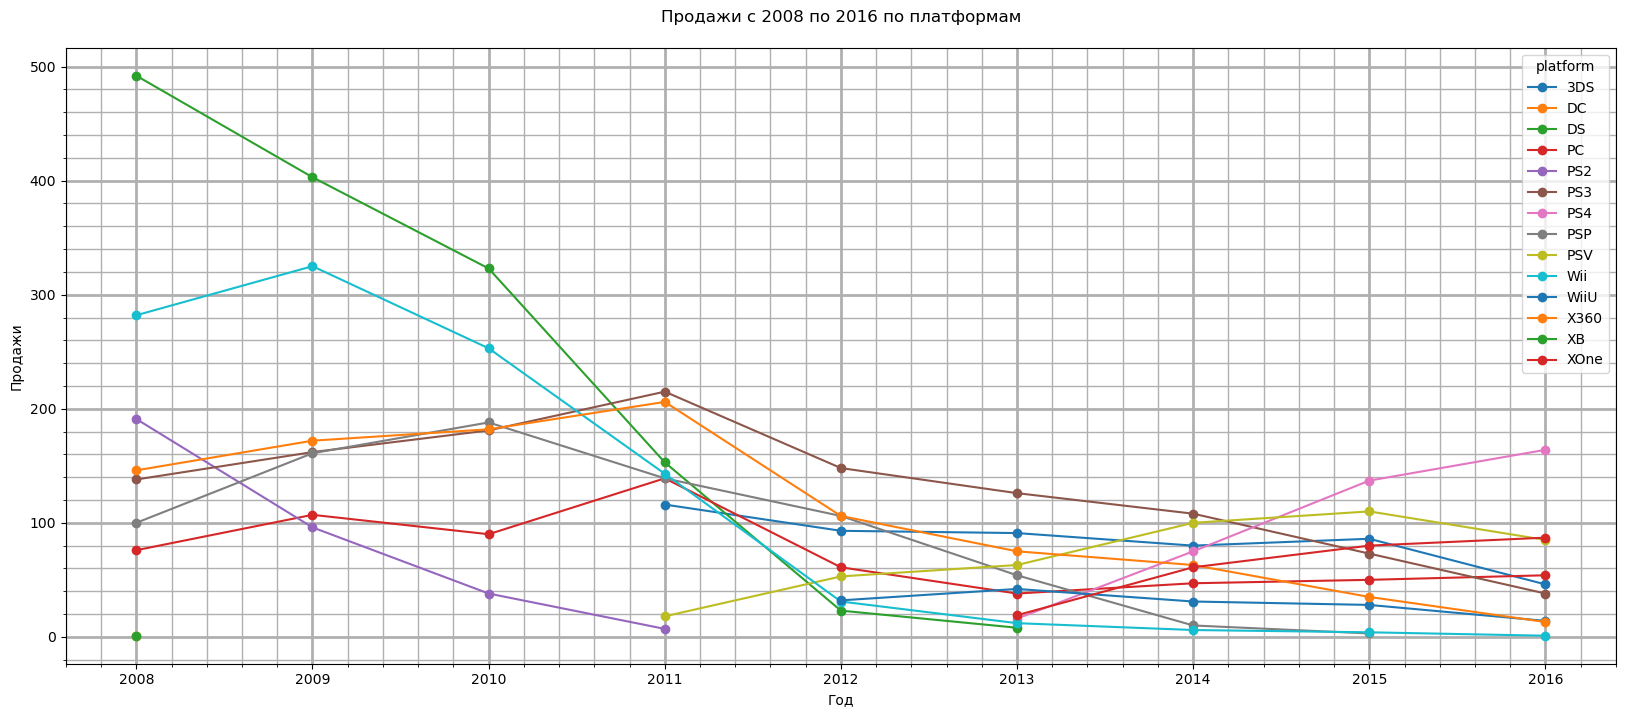

In [97]:
current_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='count').plot(figsize=(20,8), marker ='o') # создаём сводную таблицу
plt.minorticks_on()                                                                                                                            # включаем второстепенные деления сетки
plt.grid(which = 'minor', linewidth = 1)                                                                                                       # изменяем параметры второстепенной сетки
plt.grid(which = 'major', linewidth = 2)                                                                                                       # изменяем параметры основной сетки
plt.title('Продажи с 2008 по 2016 по платформам\n  ')                                                                                          # создаём заголовок графика
plt.xlabel('Год')                                                                                                                              # указываем название по оси x
plt.ylabel('Продажи')                                                                                                                          # указываем название по оси y
plt.show()                                                                                                                                     # выводим график на экран

Теория 2: проверка для крайнего 2016 года

In [98]:
current_data_2 = data[data['year_of_release'] > 2012]                                                           # создаём новый датафрейм с актуальными платформами, начиная с 2008
current_data_2.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='count')  # создаём сводную таблицу 

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,91.0,8.0,38.0,126.0,16.0,54.0,63.0,12.0,42.0,75.0,19.0
2014,80.0,NaN,47.0,108.0,75.0,10.0,100.0,6.0,31.0,63.0,61.0
2015,86.0,NaN,50.0,73.0,137.0,3.0,110.0,4.0,28.0,35.0,80.0
2016,46.0,NaN,54.0,38.0,164.0,NaN,85.0,1.0,14.0,13.0,87.0


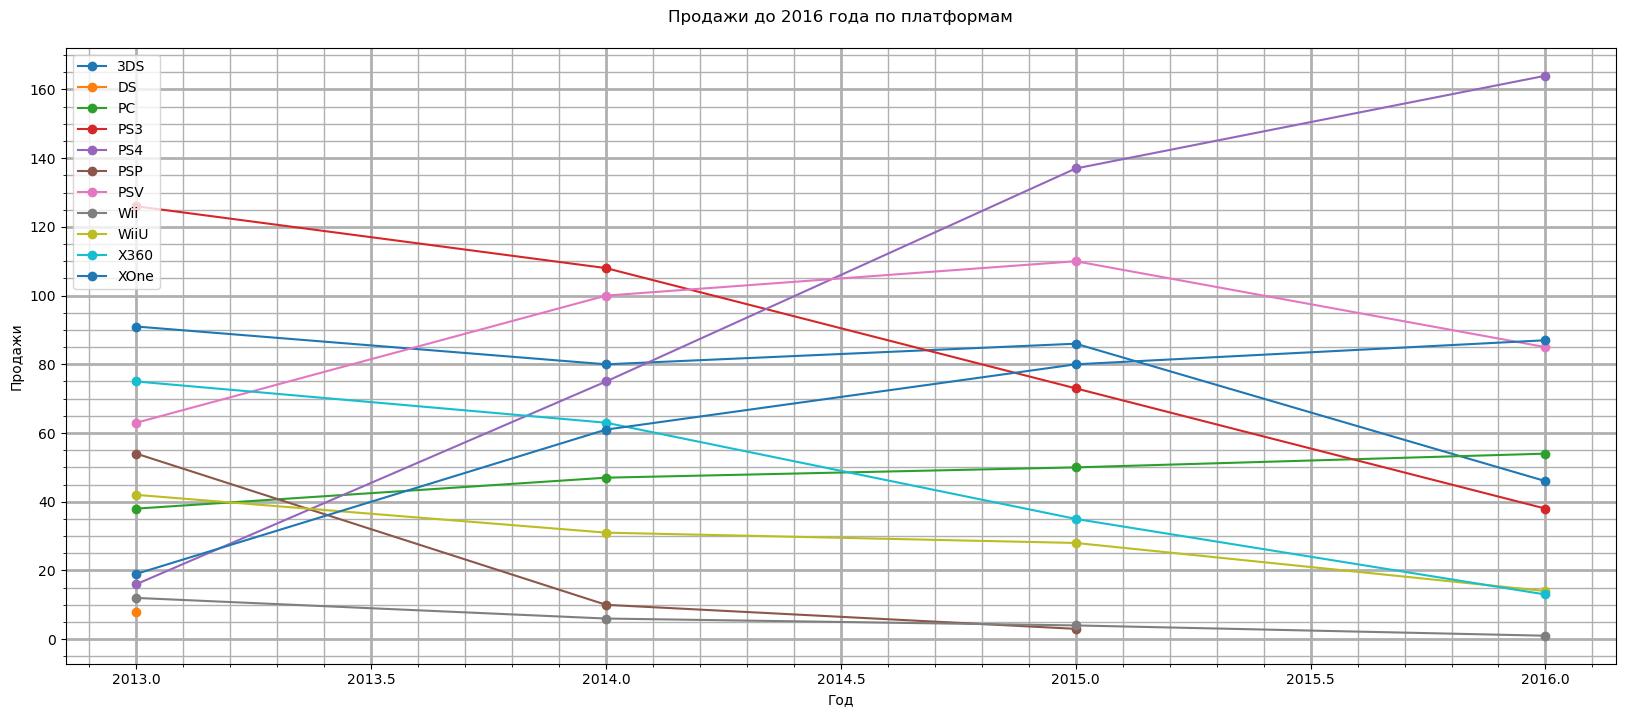

In [99]:
current_data_2.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='count').plot(figsize=(20,8), marker ='o') # создаём сводную таблицу 
plt.minorticks_on()                                                                                                                              # включаем второстепенные деления сетки
plt.grid(which = 'minor', linewidth = 1)                                                                                                         # изменяем параметры второстепенной сетки
plt.grid(which = 'major', linewidth = 2)                                                                                                         # изменяем параметры основной сетки
plt.title('Продажи до 2016 года по платформам\n  ')                                                                                              # создаём заголовок графика
plt.xlabel('Год')                                                                                                                                # указываем название по оси x
plt.ylabel('Продажи')                                                                                                                            # указываем название по оси y
plt.legend(loc='upper left')                                                                                                                     # включаем блок с отображением надписей
plt.show()                                                                                                                                       # выводим график на экран

Из графика видно, что практически все платформы по продажам упали в 2015 году. Выберим несколько потенциально прибыльных платформ, у которых рост это: **PS4, XOne, PC**. По этим данным можно построить прогноз на 2017 год для перспективных платформ.

- построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

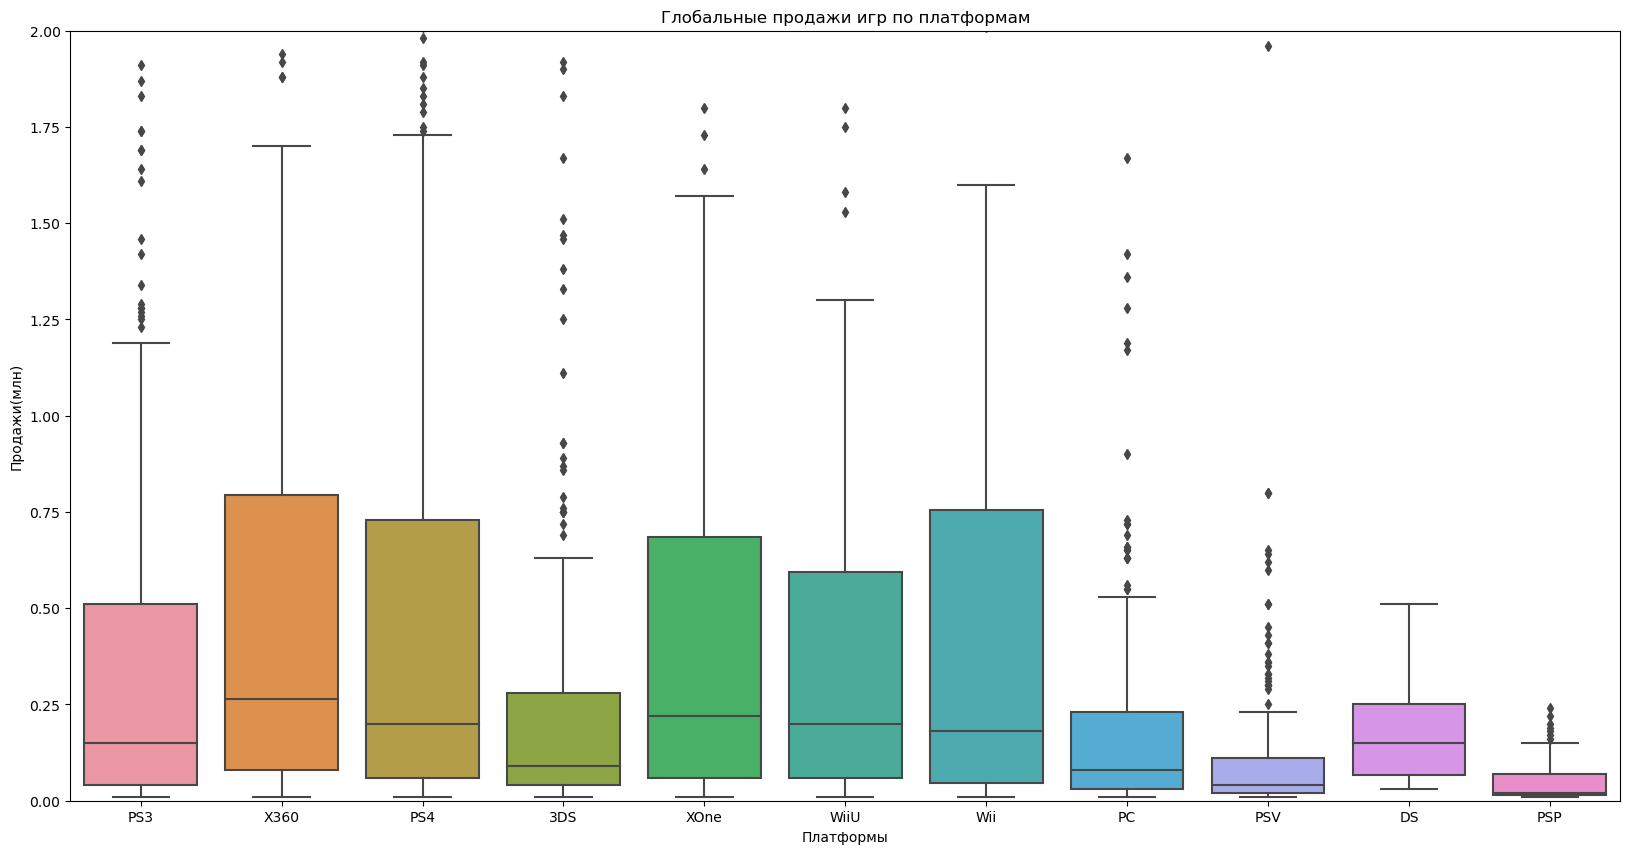

In [100]:
plt.figure(figsize=(20, 10))                                    # создаём полотно
plt.ylim(0, 2)                                                  # ограничиваем видимость полотна по высоте
sns.boxplot(data=current_data_2, x='platform', y='total_sales') # создаём "ящик с усами"
plt.title('Глобальные продажи игр по платформам')               # создаём заголовок
plt.xlabel('Платформы')                                         # указываем название по оси x
plt.ylabel('Продажи(млн)')                                      # указываем название по оси y
plt.show()                                                      # выводим график на экран

Как видно на графике лидерами продаж за расчётный период являются: **X360, Wii, PS4**, у них размах продаж по годам самый большой. **PSP** является самой непопулярной платформой, но и самой стабильной - размах самый узкий. Медианные продажи по каждой из платформ заметно в срднем около 250 тыс., но выбросы показывают, что у каждой из платформ появляются эксклюзивные игры, приносящие миллионы - доля таких успешных игр выше всего у **PS4** и **X360**, это видно по большему среднему значению числа продаж. Сравним **PC** и **XOne**, у первой платформы маленький ящик и много выбросов, это значит, что основная часть объема продаж делается за счёт выбросов. У второй платформы ситуация иная, это  большой ящик, длинный ус и мало выбросов. Это говорит о том, что на **XOne** покупают разные игры в большом количестве.

- посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

 Построим диаграмму рассеяния для одной из популярной платформы **PS4**:

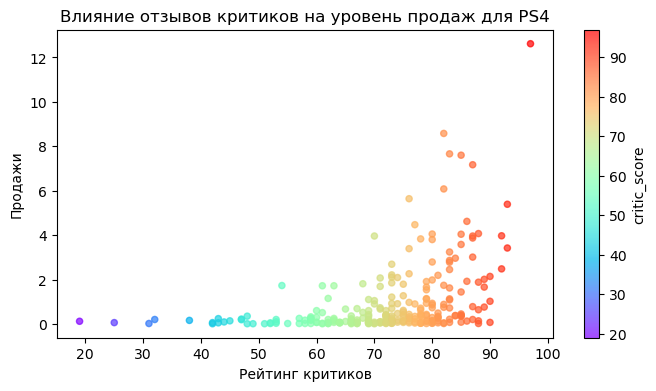

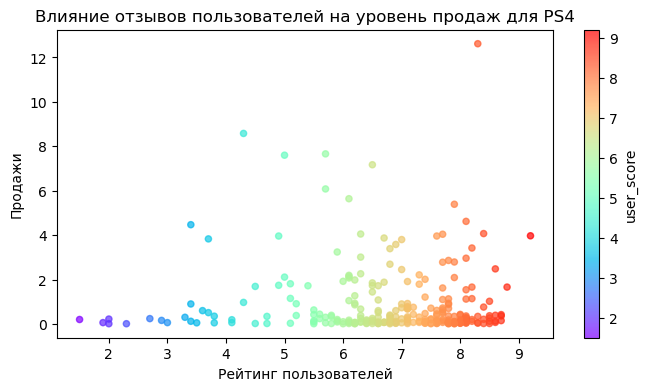

In [101]:
current_data_2.query('platform == "PS4"').plot.scatter('critic_score', 'total_sales', figsize=(8, 4), alpha=0.7, c='critic_score', colormap='rainbow', sharex=False) # создаём сводную таблицу по отзывам критиков
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние отзывов критиков на уровень продаж для PS4')
current_data_2.query('platform == "PS4"').plot.scatter('user_score', 'total_sales', figsize=(8, 4), alpha=0.7, c='user_score', colormap='rainbow', sharex=False) # # создаём сводную таблицу по отзывам пользователей 
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.title('Влияние отзывов пользователей на уровень продаж для PS4')
plt.show()

Посчитаем корреляцию Пирсона между отзывами и продажами для популярной платформы **PS4**:

In [102]:
# выводим на экран расчёт коэффициента корреляции Пирсона для пользователей
display("Коэффициент корреляции между продажами и оценкой пользователей: ",
        current_data_2[current_data_2['platform'] == 'PS4']['total_sales']
        .corr(current_data_2[current_data_2['platform'] == 'PS4']['user_score']))
# выводим на экран расчёт коэффициента корреляции Пирсона для критиков 
display("Коэффициент корреляции между продажами и оценкой критиков: ",
        current_data_2[current_data_2['platform'] == 'PS4']['total_sales']
        .corr(current_data_2[current_data_2['platform'] == 'PS4']['critic_score']))

'Коэффициент корреляции между продажами и оценкой пользователей: '

-0.031957110204556424

'Коэффициент корреляции между продажами и оценкой критиков: '

0.406567902061781

Сформулируем вывод:                                                                                                             
Объём продаж и оценки пользователей практически не коррелируют. Между объёмом продаж и оценками критиков наблюдается слабая прямая корреляция.

- соотнесём выводы с продажами игр на других платформах:

In [103]:
# выводим на экран расчёт коэффициента корреляции Пирсона для пользователей 
display("Коэффициент корреляции Пирсона между продажами и оценкой пользователей: ",
        current_data_2[current_data_2['platform'] != 'PS4']['total_sales']
        .corr(current_data_2[current_data_2['platform'] != 'PS4']['user_score']))
# выводим на экран расчёт коэффициента корреляции Пирсона для критиков
display("Коэффициент корреляции Пирсона между продажами и оценкой критиков: ",
        current_data_2[current_data_2['platform'] != 'PS4']['total_sales']
        .corr(current_data_2[current_data_2['platform'] != 'PS4']['critic_score']))

'Коэффициент корреляции Пирсона между продажами и оценкой пользователей: '

-0.0011216242093378518

'Коэффициент корреляции Пирсона между продажами и оценкой критиков: '

0.2812510848217571

Сформулируем вывод для остальных платформ:                                                                                     
Практически нет связи между продажами и оценкой пользователей, и совсем небольшая прямая связь между продажами и оценками критиков.

- Найдём самые прибыльные жанры:

In [104]:
current_data_2.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values('total_sales', ascending=False) # создаём сводную таблицу

,total_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


Так же посмотрим как выглядит график по прибыльности жанров:

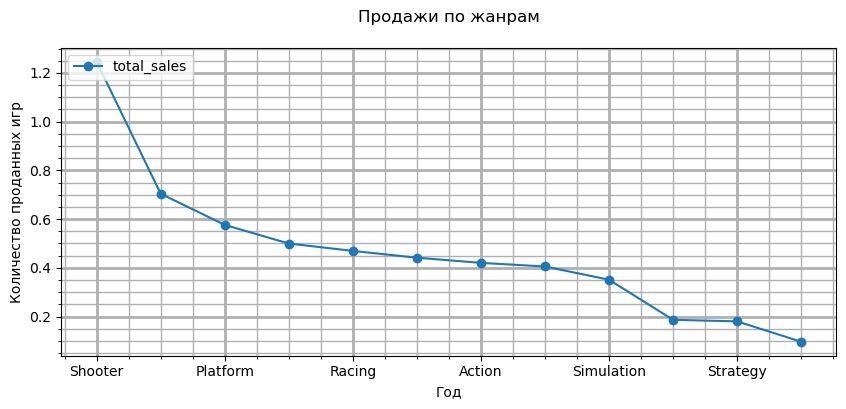

In [105]:
current_data_2.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values('total_sales', ascending=False).plot(figsize=(10,4), marker ='o') # создаём сводную таблицу
plt.minorticks_on()                                                                                                                                          # включаем второстепенные деления сетки
plt.grid(which = 'minor', linewidth = 1)                                                                                                                     # изменяем параметры второстепенной сетки
plt.grid(which = 'major', linewidth = 2)                                                                                                                     # изменяем параметры основной сетки
plt.title('Продажи по жанрам\n  ')                                                                                                                           # создаём заголовок графика
plt.xlabel('Год')                                                                                                                                            # указываем название по оси x
plt.ylabel('Количество проданных игр')                                                                                                                       # указываем название по оси y
plt.legend(loc='upper left')                                                                                                                                 # включаем блок с отображением надписей
plt.show()                                                                                                                                                   # выводим график на экран

Как видим по графику и таблице самые прибыльный жанр, это **Shooter**, так же приносят прибыль **Sports, Platform, Role-Playing, Racing**. Самый не прибыльный - **Adventure**.

### Вывод по исследовательскому анализу данных:

- самое большое количество игр создавалось в 2008-2009 годах;
- средний срок жизни платформ прримерно 9 лет;
- потенциально прибыльные платформы это: **PS4, XOne, PC**;
- по корреляции Пирсона практически нет связи между продажами и оценкой пользователей, и совсем небольшая прямая связь между продажами и оценками критиков;
- самый популярный и прибыльный жанр игр - **Shooter**, самый не прибыльный - **Adventure**.

## Шаг 4. Составление портрета пользователя каждого региона:

Построим графики по количеству платформ для каждого региона:

'Платформы Северной Америки'

<AxesSubplot:xlabel='platform'>

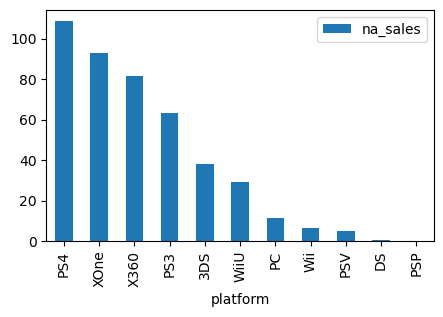

In [106]:
# строим график 
display('Платформы Северной Америки', current_data_2.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
       .sort_values(ascending=False, by = 'na_sales')
       .plot(kind = 'bar', figsize=(5,3)))

'Платформы Европы'

<AxesSubplot:xlabel='platform'>

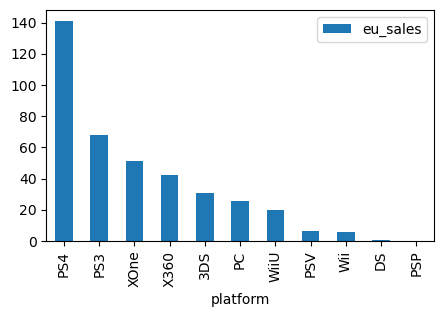

In [107]:
# строим график, используя расчёты сводной таблицы
display('Платформы Европы', current_data_2.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
       .sort_values(ascending=False, by = 'eu_sales')
       .plot(kind = 'bar', figsize=(5,3)))

'Платформы Японии'

<AxesSubplot:xlabel='platform'>

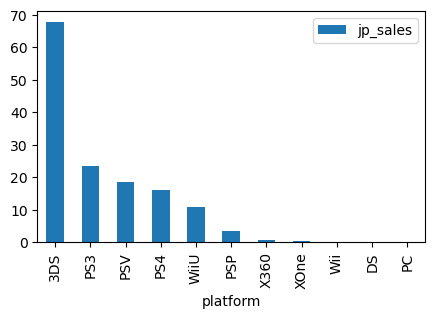

In [108]:
# строим график, используя расчёты сводной таблицы
display('Платформы Японии', current_data_2.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
       .sort_values(ascending=False, by = 'jp_sales')
       .plot(kind = 'bar', figsize=(5,3)))

- определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5):

In [109]:
# создаём и выводим сводные таблицы
display(current_data_2.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False).head())
display(current_data_2.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False).head())
display(current_data_2.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False).head())

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Выбор платформ (топ-5) для пользователей Северной Америке и Европы похожий(**PS4, XOne, X360, PS3, 3DS**). 
В Японии отдают предпочтения приставкам своего производства (**3DS, PS3, PSV, PS4, WiiU**).
В первых двух регионах лидируют **PS4**. А в Японии **3DS**.

- определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5):

In [110]:
# создаём и выводим сводные таблицы
display(current_data_2.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False).head())
display(current_data_2.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False).head())
display(current_data_2.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False).head())

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


In [111]:
# группировка данных
genre_top_na = current_data_2.groupby('genre')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
genre_top_eu = current_data_2.groupby('genre')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
genre_top_jp = current_data_2.groupby('genre')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

Посмотрим как выглядят графики:

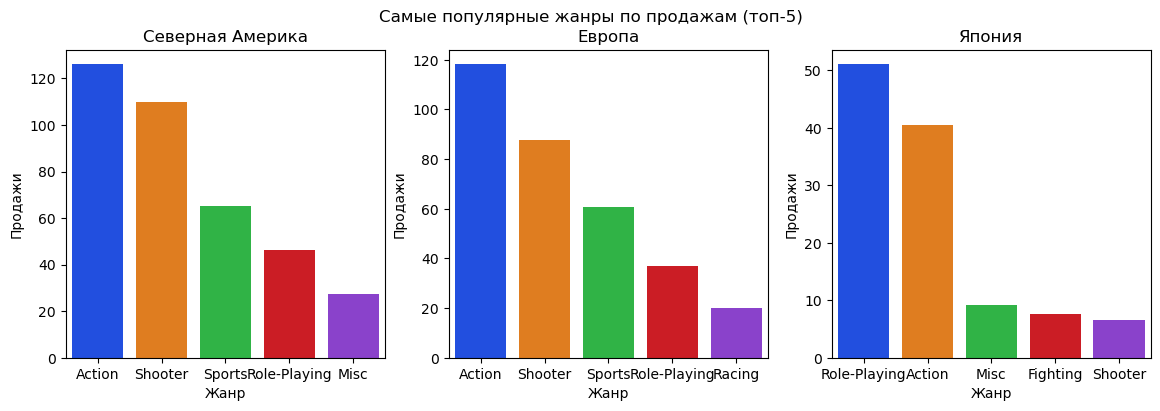

In [112]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
fig.suptitle('Cамые популярные жанры по продажам (топ-5)')
sns.barplot(y='na_sales', x='genre', data=genre_top_na, ax=ax[0], palette='bright')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Жанр')
sns.barplot(y='eu_sales', x='genre', data=genre_top_eu, ax=ax[1], palette='bright')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Жанр')
sns.barplot(y='jp_sales', x='genre', data=genre_top_jp, ax=ax[2], palette='bright')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Жанр')
plt.show()

Предпочтения по популярным жанрам (топ-5) у пользователей Северной Америки такие: **Action, Shooter, Sports, Role-Playing, Misc**. У пользователей Европы: **Action, Shooter, Sports, Role-Playing, Racing**. Как видно предпочтения практически идентичны. У пользователей Японии совсем другие предпочтения по жанрам(**Role-Playing, Action, Misc, Fighting, Shooter**).

- влияние рейтинга ESRB на продажи в отдельном регионе:

In [113]:
# создаём и выводим сводные таблицы
display(current_data_2.pivot_table(index=['rating'], values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False).head(10))
display(current_data_2.pivot_table(index=['rating'], values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False).head(10))
display(current_data_2.pivot_table(index=['rating'], values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False).head(10))

,na_sales
rating,
M,165.21
absent,89.42
E,79.05
E10+,54.24
T,49.79


,eu_sales
rating,
M,145.32
E,83.36
absent,78.91
E10+,42.69
T,41.95


,jp_sales
rating,
absent,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


In [114]:
current_data_2['rating'].unique() # посмотрим уникальные значения в столбце рейтинга

array(['M', 'absent', 'E', 'T', 'E10+'], dtype=object)

In [115]:
# группировка данных
rating_na = current_data_2.groupby('rating')['na_sales'].agg(na_sales='sum').reset_index()
rating_eu = current_data_2.groupby('rating')['eu_sales'].agg(eu_sales='sum').reset_index()
rating_jp = current_data_2.groupby('rating')['jp_sales'].agg(jp_sales='sum').reset_index()

Посмотрим как выглядят графики:

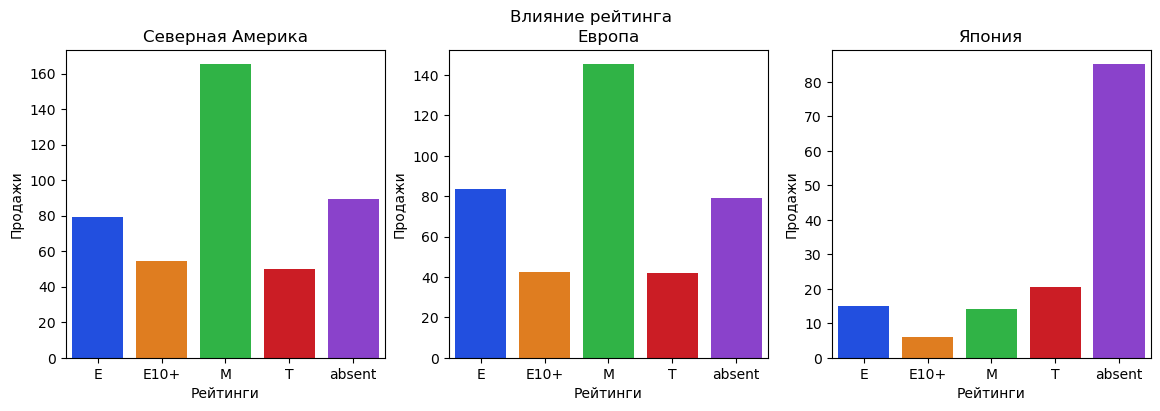

In [116]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
fig.suptitle('Влияние рейтинга')
sns.barplot(y='na_sales', x='rating', data=rating_na, ax=ax[0], palette='bright')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Рейтинги')
sns.barplot(y='eu_sales', x='rating', data=rating_eu, ax=ax[1], palette='bright')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Рейтинги')
sns.barplot(y='jp_sales', x='rating', data=rating_jp, ax=ax[2], palette='bright')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Рейтинги')
plt.show()

Поясним, что означает каждый рейтинг: Е- 6 лет, E10+ - от 10 лет, М- 17, Т- 13, 'absent' - отсутствует.
Видно, что в Северной Америке и Европе в большинстве играют категории М и Е. В Японии категории Т и Е, но подавляющее большинство с неизвестным рейтингом, возможно это связано с непопулярностью организации ESRB в этом регионе, поэтому отсутствуют данные для этих игр. В Японии пользуются Computer Enterteainment Rating Organization (CERO).

Можно сделать общий вывод, что пользователи предпочитают играть на платформах своей же страны.

## Шаг 5. Проверка гипотез:

- средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые:

 Сформулируем гипотезы:                                                                                                        
 Нулевая гипотеза H0: Средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые;                              
 Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ **Xbox One** и **PC** различаются.                      
 Зададим критический уровень статистической значимости 0.05. 

In [117]:
sample_1 = current_data_2[current_data_2['platform'] == 'XOne']['user_score'].dropna() # рейтинги пользователей Xbox One
sample_2 = current_data_2[current_data_2['platform'] == 'PC']['user_score'].dropna()   # рейтинги пользователей PC

alpha = 0.05                                                                           # задаём уровень статистической значимости 
results = st.ttest_ind(sample_1,sample_2)                                              # проводим тест

print('p-значение:', results.pvalue)                                                   # выведим на экран получившееся p-значение

if results.pvalue < alpha:                                                             # сравниваем p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу.                                                                                     
Поэтому проведённый нами тест подтверждает гипотезу: средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые

- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:

Сформулируем гипотезы:                                                                                                        
 Нулевая гипотеза H0: средние пользовательские рейтинги жанров **Action** и **Sports** одинаковые;                              
 Альтернативная гипотеза H1: средние пользовательские рейтинги жанров **Action** и **Sports** разные.                      

In [128]:
sample_3 = current_data_2[current_data_2['genre'] == 'Action']['user_score'].dropna()   # рейтинги пользователей Action
sample_4 = current_data_2[current_data_2['genre'] == 'Sports']['user_score'].dropna()   # рейтинги пользователей Sports

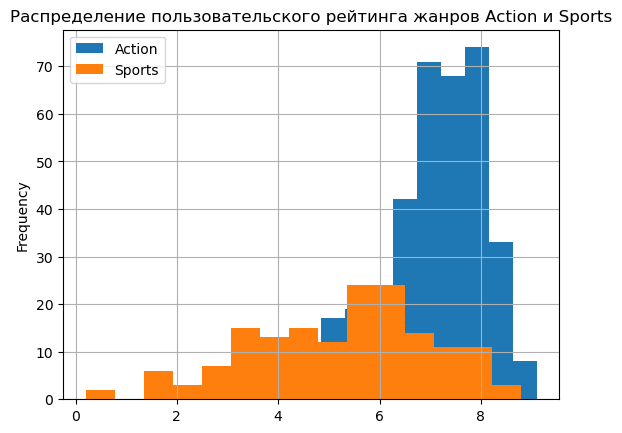

In [129]:
sample_3.plot(kind='hist', label='Action', bins=15, grid=True)               # строим график 'Action'
sample_4.plot(kind='hist', label='Sports', bins=15, grid=True)               # строим график 'Sports'
plt.title('Распределение пользовательского рейтинга жанров Action и Sports') # создаём заголовок графика
plt.legend(loc='upper left')                                                 # включаем отображение легенды
plt.show()                                                                   # выводим график

Дисперсии выборок не равны, поэтому equal_var = False.                                                                         
Зададим критический уровень статистической значимости 0.05. 

In [130]:
alpha = 0.05                                                   # задаём уровень статистической значимости 
results = st.ttest_ind(sample_3,sample_4, equal_var = False)   # проводим тест

print('p-значение:', results.pvalue)                           # выведим на экран получившееся p-значение

if results.pvalue < alpha:                                     # сравниваем p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу.                                                                                                     
Проведённый нами тест не подтверждает гипотезу Н0 о равенстве выборок. Поэтому остается верным утверждение, что средние пользовательские рейтинги жанров **Action** и **Sports** разные.

## Шаг 6. Общий вывод:

В ходе работы была проведена подготовка данных - заменили названия столбцов, преобразовали данные в нужжные типы, обработали пропуски, посчитали суммарные продажи во всех регионах и записали их в отдельный столбец. Так же был проведён исследовательский анализ данных. Было обнаружено, что самое большое количество игр создавалось в 2008-2009 годах. Средний срок жизни платформ прримерно 9 лет. Определили потенциально прибыльные платформы, у которых наблюдается рост по продажам: PS4, XOne, PC. И по этим данным можно построить прогноз на 2017 год. Определили лидеров продаж за расчётный период: X360, Wii, PS4. Определили, что практически нет связи между продажами и оценкой пользователей, и совсем небольшая прямая связь между продажами и оценками критиков, скорее всего новые покупатели немного обращают внимание на оценки критиков и совсем не обращают на оценки пользователей. Определили самый прибыльный жанр, это Shooter. Так же составили портрет пользователя каждого региона. Выяснили, что выбор топ-5 платформ для пользователей Северной Америке и Европы похожий(PS4, XOne, X360, PS3, 3DS). В Японии отдают предпочтения приставкам своего производства (3DS, PS3, PSV, PS4, WiiU). В первых двух регионах лидирует платформа PS4, а в Японии 3DS. Предпочтения по популярным жанрам у пользователей Северной Америки и Европы практически идентичны. У пользователей Японии совсем другие предпочтения по жанрам. В Северной Америке и Европе в основном играют взрослые и дети. В Японии подростки и дети.  Проведённый нами тест по проверке гипотезы о схожести пользовательского рейтинга по заданным платформам подтвердил, что они одинаковые и гипотеза H0 подтвердилась. А по жанрам, о разных средних пользовательских рейтингах, гипотеза Н0 не подтвердилась, следовательно они разные.                                                                                       
Рекомендации для последующих шагов: В Японии пользуются Computer Enterteainment Rating Organization (CERO) - нужно добавить этот рейтинг в основной датасет. Так как мы рассмотрели распределение рейтингов по регионам, можно ещё провести анализ рейтингов по
миру, т.е. без распределения по регионам.